# KNN(K Nearest Neibhours)

# Import Libraries

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load Iris Dataset 

In [23]:
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features (sepal length and sepal width)
y = iris.target  # Target (class labels: Setosa, Versicolour, Virginica)

# Split the dataset into training and testing sets

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for KNN)

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN classifier with k=3

In [26]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

# Make predictions

In [27]:
y_train_predict = knn.predict(X_train_scaled)
y_test_predict = knn.predict(X_test_scaled)

# Evaluate the model

In [28]:
train_accuracy = accuracy_score(y_train, y_train_predict)
test_accuracy = accuracy_score(y_test, y_test_predict)
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_predict))

Train Accuracy: 0.8333333333333334
Test Accuracy: 0.8333333333333334

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.75      0.67      0.71         9
           2       0.75      0.82      0.78        11

    accuracy                           0.83        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.83      0.83      0.83        30



# Visualizing the Decision Boundary

In [31]:
# Visualizing the Decision Boundary
def plot_decision_boundary(X, y, model, ax):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title("KNN Decision Boundary")

# Plot the decision boundary using the first two features of the Iris dataset

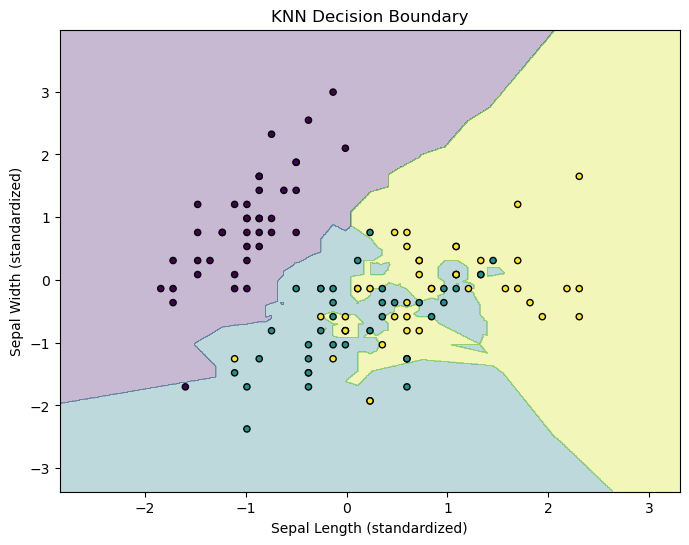

In [32]:
plt.figure(figsize=(8, 6)) 
plot_decision_boundary(X_train_scaled, y_train, knn, plt.gca())
plt.xlabel("Sepal Length (standardized)")
plt.ylabel("Sepal Width (standardized)")
plt.show()